# Behavioural analysis

## Preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [65]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName))
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
#print allSubjDirs
stairs = pd.DataFrame()
intns, resps, revMeans = [],[],[] # matrices for intensities, responses, and means of reversals
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps
def computeRevMeans(thisDat,nRevs):
    revLen = np.shape(thisDat.reversalIntensities)[0]
    #print thisDat.reversalIntensities
    #print revLen
    if revLen >= nRevs:
        return np.average(thisDat.reversalIntensities[-nRevs])
    else:
        return 0
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisDat = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisDat.intensities)
        resps.append(thisDat.data)
        revMeans.append([computeRevMeans(thisDat,4), 
                         computeRevMeans(thisDat,6), 
                         computeRevMeans(thisDat,8)])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'sessionLabel': os.path.basename(subjStairsPath),
                    'stairLabel': [subjStairLabel]
                }))
        #print np.round(thisDat.intensities,2)
        #print thisDat.data # responses (correct/incorrect)
        #print thisDat.extraInfo

C:\Users\Egor\Dropbox\Projects\mc\data\mc2_tgT-mcBv\mc2_tgT-mcBv_p0_s1_2017-01-21_1548


In [66]:
print stairs.shape
print stairs.columns
stairs.head(5)

(12, 25)
Index([u'expName', u'time', u'participant', u'session', u'nTrials', u'mcSz',
       u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap', u'mcPeriFade', u'targSz',
       u'targSf', u'targOri1', u'targOri2', u'targXoff', u'targYoff', u'targV',
       u'targTtot', u'targTpeak', u'trialT', u'fixCross', u'stairLabel',
       u'stairStart', u'stairMean'],
      dtype='object')


,expName,time,participant,session,nTrials,mcSz,mcSf,mcBv,mcBsf,mcPeriGap,...,targXoff,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,stairMean
0,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,256,0.1,4.80,0.05,112,...,0,0,0,1,0.5,2,0,st-1.0_mcBv-4.8_targTpeak-0.5,1.0,0.235692
1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,256,0.1,4.80,0.05,112,...,0,0,0,1,1.0,2,0,st-1.0_mcBv-4.8_targTpeak-1.0,1.0,0.235692
2,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,256,0.1,4.80,0.05,112,...,0,0,0,1,1.0,2,0,st-0.1_mcBv-4.8_targTpeak-1.0,0.1,-0.013532
3,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,256,0.1,0.01,0.05,112,...,0,0,0,1,1.5,2,0,st-1.0_mcBv-0.01_targTpeak-1.5,1.0,0.235692
4,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,256,0.1,4.80,0.05,112,...,0,0,0,1,0.5,2,0,st-0.1_mcBv-4.8_targTpeak-0.5,0.1,0.028765


In [67]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
print revMeans
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(12L, 20L)
(12L, 20L)
(12L, 3L)
[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]
(12, 2)


,sessionLabel,stairLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5
1,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-1.0
2,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-0.1_mcBv-4.8_targTpeak-1.0
3,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-0.01_targTpeak-1.5
4,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-0.1_mcBv-4.8_targTpeak-0.5


Combining the trial data into a tall df.

In [101]:
nTrials = np.shape(resps)[1]
nStairs = np.shape(resps)[0]
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrials)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrials,nTrials),nStairs)
orderInfoRepd['intns'] = np.array(intns).flatten()
orderInfoRepd['resps'] = np.array(resps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on='stairLabel')
trials['condLabel'] = 'mcBv-' + trials.mcBv.astype(str) + '_' + \
                      'tgT-' + trials.targTpeak.astype(str)
#orderInfoRepd['condLabel'] = orderInfoRepd.stairLabel[-22:-1]
trials.head(5)

(240, 2)


,sessionLabel,stairLabel,trialN,intns,resps,expName,time,participant,session,nTrials,...,targXoff,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairStart,stairMean,condLabel
0,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5,1.0,1.000000,1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,...,0,0,0,1,0.5,2,0,1.0,0.235692,mcBv-4.8_tgT-0.5
1,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5,2.0,0.894954,1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,...,0,0,0,1,0.5,2,0,1.0,0.235692,mcBv-4.8_tgT-0.5
2,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5,3.0,0.820499,1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,...,0,0,0,1,0.5,2,0,1.0,0.235692,mcBv-4.8_tgT-0.5
3,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5,4.0,0.761479,1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,...,0,0,0,1,0.5,2,0,1.0,0.235692,mcBv-4.8_tgT-0.5
4,mc2_tgT-mcBv_p0_s1_2017-01-21_1548.csv,st-1.0_mcBv-4.8_targTpeak-0.5,5.0,0.710500,1,mc2_tgT-mcBv,2017-01-21_1548,0,1,20,...,0,0,0,1,0.5,2,0,1.0,0.235692,mcBv-4.8_tgT-0.5


(-0.1, 1.1)

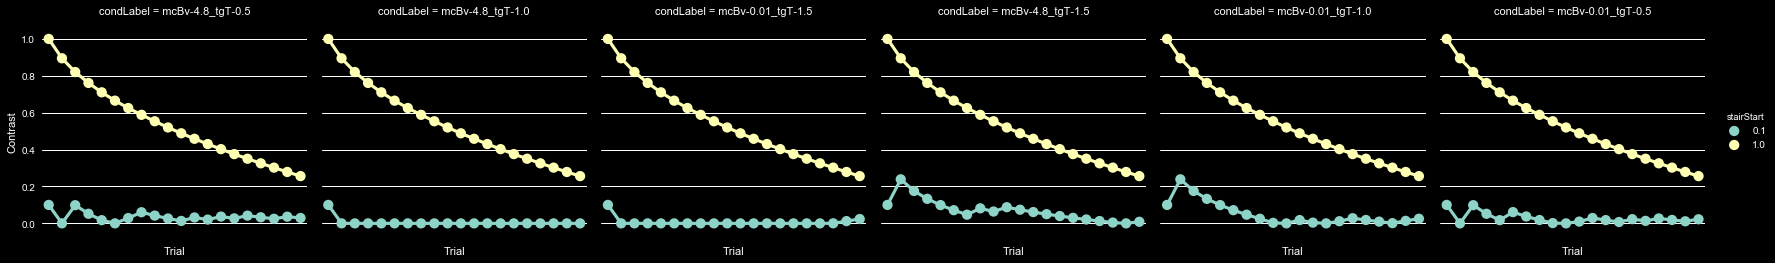

In [108]:
g = sns.factorplot(x='trialN', y='intns', hue='stairStart', col='condLabel', data=trials, 
               ci=None)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-0.1,1.1)

In [72]:
# Measuring velocities in dps:
ds.vR = np.round(ds.vR*60/35,1)
ds.vL = np.round(ds.vL*60/35,1)
# Creating columns for the slower and faster of the two speeds:
ds['vMin'] = np.amin([ds['vL'], ds['vR']], axis=0)
ds['vMax'] = np.amax([ds['vL'], ds['vR']], axis=0)
# Slow, fast, and velocity difference columns:
ds['slow'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMin),'slow'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMin),'slow'] = 1
ds.ix[ds.nf270==1,'slow'] = 1
ds['fast'] = 0
ds.ix[(ds.nf180==1) & (ds.vL==ds.vMax),'fast'] = 1
ds.ix[(ds.nf000==1) & (ds.vR==ds.vMax),'fast'] = 1
ds['vDiff'] = np.round(ds.vMax-ds.vMin,0)

In [89]:
# The minimum size of the ring in the old paradigm corresponded to full field, so recoding:
ds.ix[ds['ringSz']==25.8,'ringSz'] = 258
ds['ringSzDeg'] = np.round(ds.ringSz/35,1)
# The full-field should be coded as 'no center-surround', or 'no ring':
ds['ring'] = 0
ds.ix[ds.ringSz!=258,'ring'] = 1
# Two separate data sets for ring and no ring:
#ssRing = ds[ds.ring==1]
#ssNoRing = ds[ds.ring==0]
# Separate data sets for fast and slow:
#ssSlow = ds[ds.slow==1]
#ssFast = ds[ds.fast==1]
# Slow/fast center/whole
ds['slowCenter'] = 0
ds.ix[(ds.slow==1) & (ds.ring==1),'slowCenter'] = 1
ds['fastCenter'] = 0
ds.ix[(ds.fast==1) & (ds.ring==1),'fastCenter'] = 1
ds['slowWhole'] = 0
ds.ix[(ds.slow==1) & (ds.ring==0),'slowWhole'] = 1
ds['fastWhole'] = 0
ds.ix[(ds.fast==1) & (ds.ring==0),'fastWhole'] = 1

In [90]:
ds.head(5)

,expName,time,participant,session,trialN,dirL,dirR,vL,vR,szL,...,vMax,slow,fast,vDiff,ringSzDeg,ring,slowCenter,fastCenter,slowWhole,fastWhole
0,mcvct_bv0,2016-10-18_1556,0,1,1,180,0,1.0,8.2,256,...,8.2,1,0,7.0,7.4,0,0,0,1,0
1,mcvct_bv0,2016-10-18_1556,0,1,2,0,180,2.1,4.1,256,...,4.1,0,1,2.0,2.8,1,0,1,0,0
2,mcvct_bv0,2016-10-18_1556,0,1,3,0,180,8.2,16.5,256,...,16.5,0,1,8.0,3.9,1,0,1,0,0
3,mcvct_bv0,2016-10-18_1556,0,1,4,0,180,8.2,0.5,256,...,8.2,1,0,8.0,3.9,1,1,0,0,0
4,mcvct_bv0,2016-10-18_1556,0,1,5,0,180,4.1,0.0,256,...,4.1,1,0,4.0,3.9,1,1,0,0,0


### Occurrence of center-surround as a function of speed combinations

#### Slow center

(-0.1, 1.1)

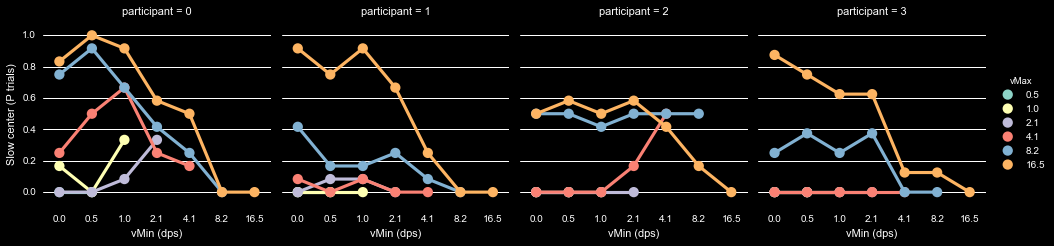

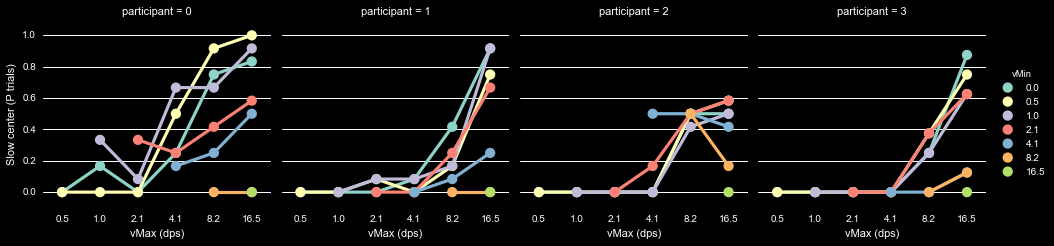

In [94]:
g = sns.factorplot(x='vMin', y='slowCenter', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Slow center (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slowCenter', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Slow center (P trials)')
plt.ylim(-0.1,1.1)

There is a clear relationship between maximum speed and the occurrence of slow center: if either of two speeds is 8cpd or above, the center is likely to appear slow, especially if the other velocity is low.

(-0.1, 1.1)

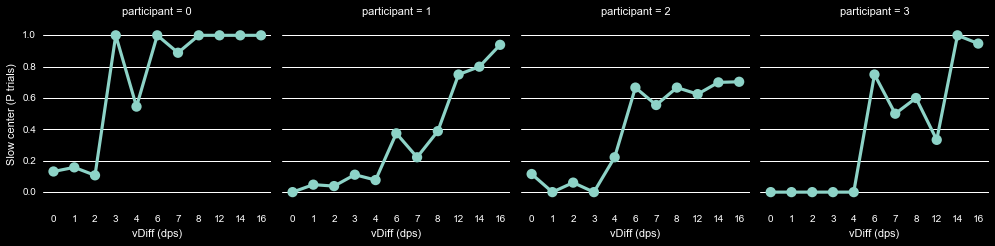

In [77]:
g = sns.factorplot(x='vDiff', y='ring', col='participant', data=ssSlow, 
               col_wrap=4, size=3.5, ci=None, estimator=np.mean)
g.set_axis_labels('vDiff (dps)','Slow center (P trials)')
g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
plt.ylim(-0.1,1.1)

Center-surround effect is associated with higher maximum speeds.

#### Fast center

(-0.1, 1.1)

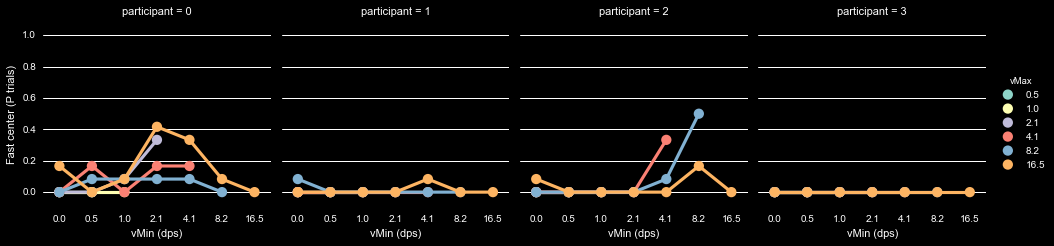

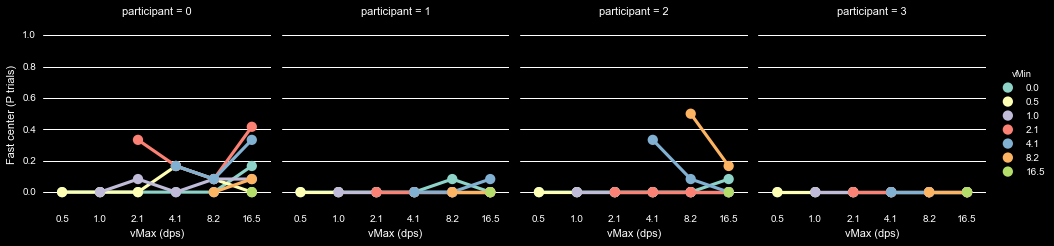

In [97]:
g = sns.factorplot(x='vMin', y='fastCenter', hue='vMax', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Fast center (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fastCenter', hue='vMin', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Fast center (P trials)')
plt.ylim(-0.1,1.1)

(-0.1, 1.1)

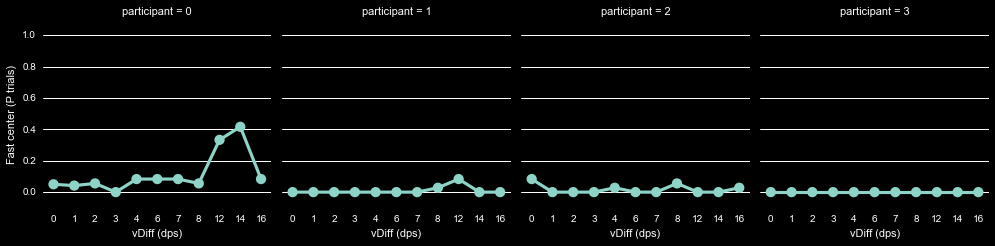

In [100]:
g = sns.factorplot(x='vDiff', y='fastCenter', col='participant', data=ds, 
               col_wrap=4, size=3.5, ci=None, estimator=np.mean)
g.set_axis_labels('vDiff (dps)','Fast center (P trials)')
g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
plt.ylim(-0.1,1.1)

Very rare instances of fast center.

## Center size for different speed combinations

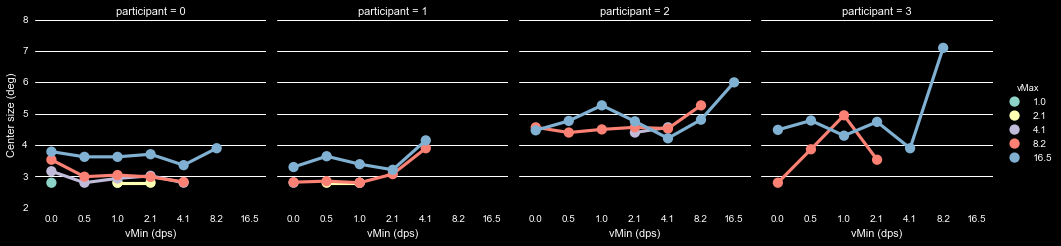

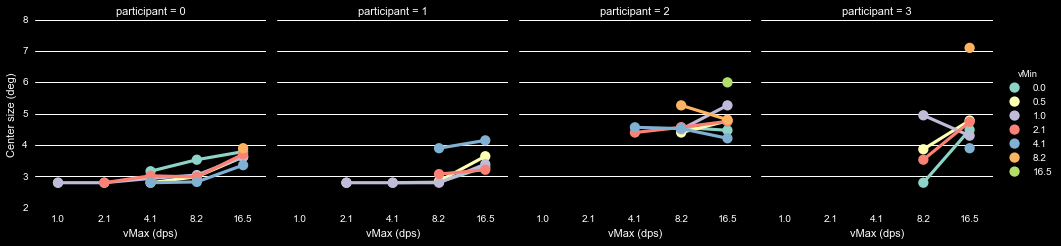

In [102]:
g = sns.factorplot(x='vMin', y='ringSzDeg', hue='vMax', col='participant', data=ssRing, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMin (dps)','Center size (deg)')
g = sns.factorplot(x='vMax', y='ringSzDeg', hue='vMin', col='participant', data=ssRing, 
               col_wrap=4, size=3.5, ci=None)
g.set_axis_labels('vMax (dps)','Center size (deg)')

(-0.5, 8)

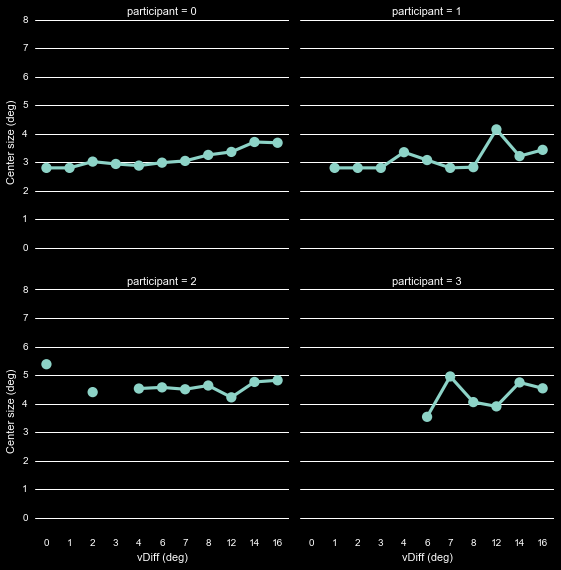

In [101]:
g = sns.factorplot(x='vDiff', y='ringSzDeg', col='participant', data=ssRing, 
               col_wrap=2, size=4, ci=None)
g.set_axis_labels('vDiff (deg)','Center size (deg)')
g.set_xticklabels(np.sort(ds['vDiff'].unique().astype(int)))
plt.ylim(-0.5,8)

 Generally, slightly larger center size with increased difference between the two competing speeds.

### Type of response as a function of velocity in whole-field trials

#### Whole-field slow

(-0.1, 1.1)

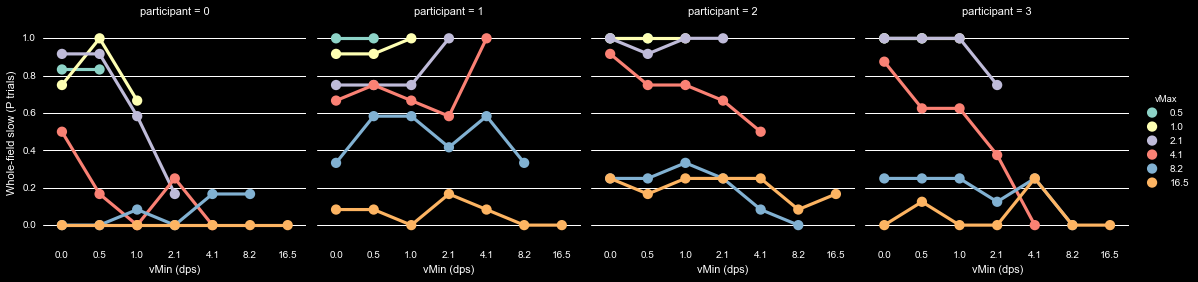

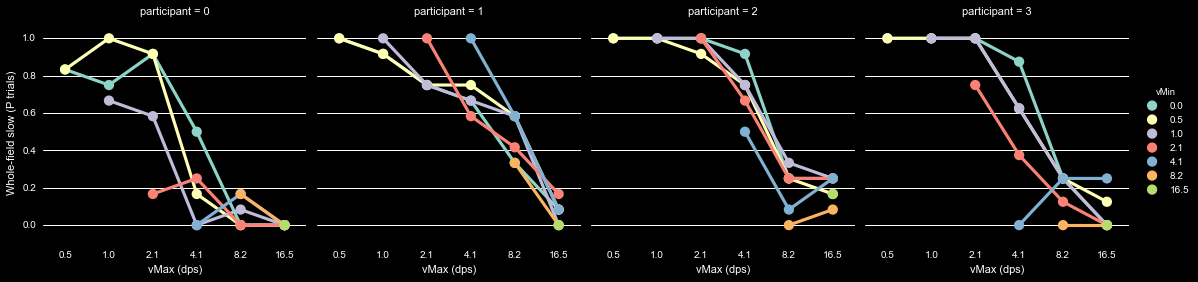

In [106]:
g = sns.factorplot(x='vMin', y='slowWhole', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field slow (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='slowWhole', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field slow (P trials)')
plt.ylim(-0.1,1.1)

Whole-field slow responses are mostly confined to instances when both stimuli are slow.

#### Whole-field fast

(-0.1, 1.1)

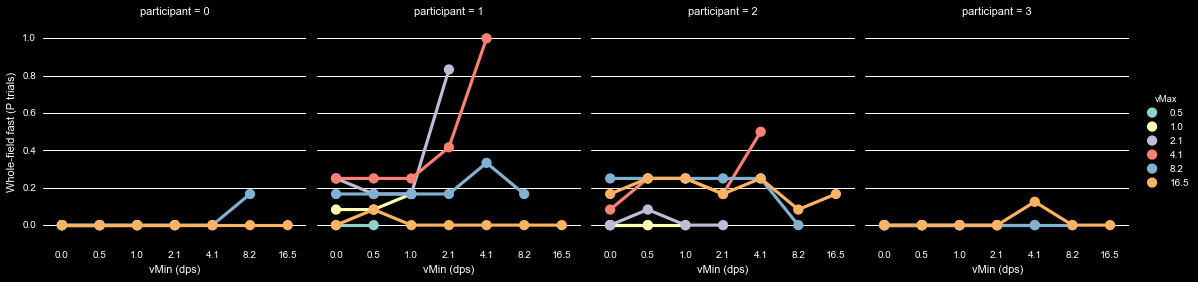

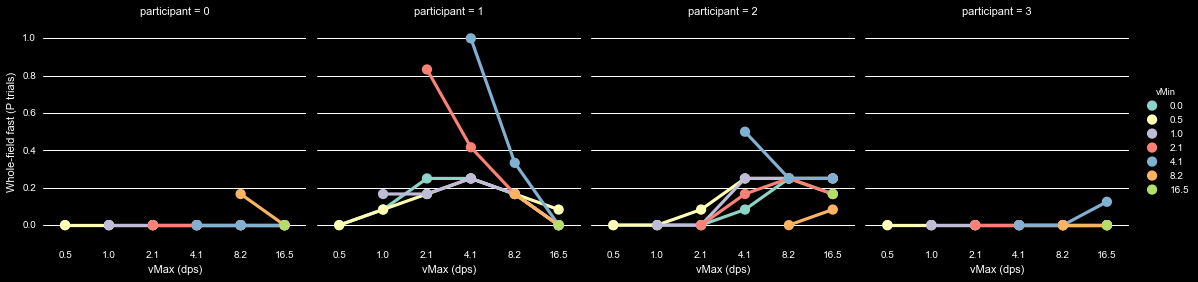

In [111]:
g = sns.factorplot(x='vMin', y='fastWhole', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field fast (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='fastWhole', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field fast (P trials)')
plt.ylim(-0.1,1.1)

Whole-field fast responses occur rarely, and only for two out of four participants, for intermediate speeds.

#### Whole-field transparency

(-0.1, 1.1)

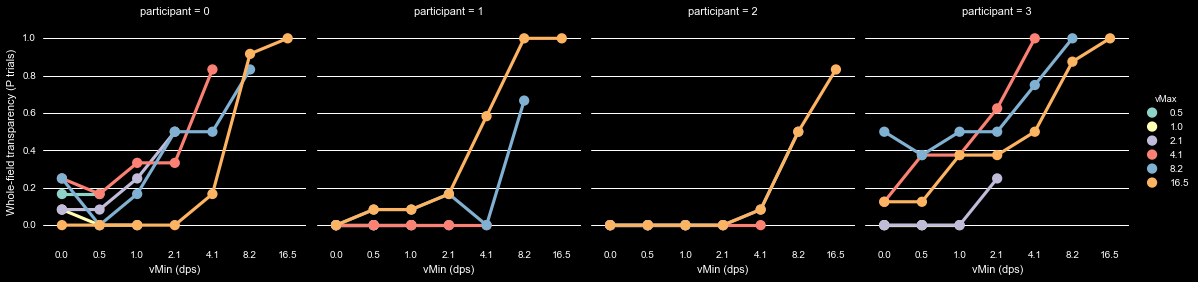

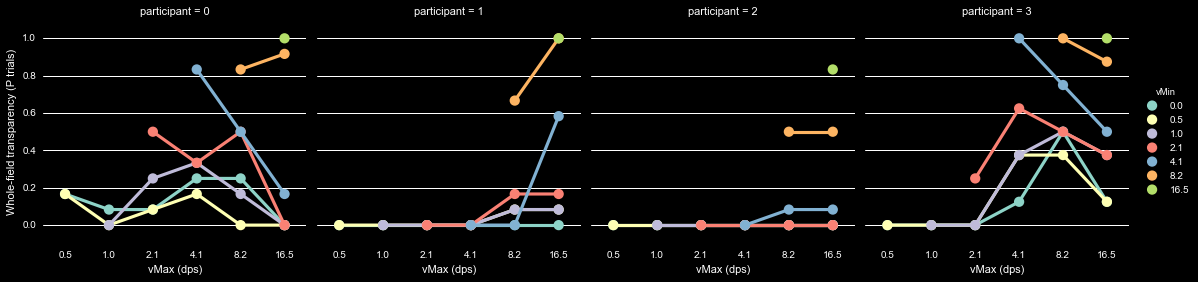

In [110]:
g = sns.factorplot(x='vMin', y='nf090', hue='vMax', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMin (dps)','Whole-field transparency (P trials)')
plt.ylim(-0.1,1.1)
g = sns.factorplot(x='vMax', y='nf090', hue='vMin', col='participant', col_wrap=4,
                   data=ds, ci=None, dodge=.0)
g.set_axis_labels('vMax (dps)','Whole-field transparency (P trials)')
plt.ylim(-0.1,1.1)

Transparency is perceived when both motions are fast. As they move in the opposite direction, they seem to happen on top of each other.

In [41]:
ds.groupby(['participant'],
                     as_index=False)['ringSzDeg'].agg([np.count_nonzero, np.size]).reset_index()

,participant,count_nonzero,size
0,0,288.0,288.0
1,1,288.0,288.0
2,2,288.0,288.0
3,3,192.0,192.0


# Eye-tracking data

## Data import

In [69]:
subjEtPath = glob.glob(allSubjDirs[6] + '/' + 'data.asc')[0]
print subjEtPath
# Importing the data set the first time, with all the accompanying mess, for reading messages:
with open(subjEtPath) as f:
    mess = f.readlines()
# A cleaner import using cili to just read out the ET data:
from cili.util import *
from cili.cleanup import *
samps, events = load_eyelink_dataset(subjEtPath)
# Optional cleaning (probably not necessary):
#samps = interp_eyelink_blinks(samps, events, interp_fields=["pup_l"])
#samps = interp_zeros(samps, interp_fields=["pup_l"])
print samps.head(5)
print samps.columns
#print samps.ix[849896:849900]
# cili's native extraction of ranges for each event unfortunately doesn't work, although...
# ... I probably don't need it anyway:
from cili.extract import extract_event_ranges
ranges = extract_event_ranges(samps, events, end_offset=1000)
# With the 'messy' data set, creating a lookup table with the trial numbers and time stamps:
trialStr = [s for s in mess if 'TRIALID' in s]
trialTS = map(int,[s[s.index('\t')+1:s.index(' T')] for s in trialStr])
trialN = map(int,[s[s.index('D ')+2:s.index('\n')] for s in trialStr])
trialStartStr = [s for s in mess if 'START' in s]
trialStart = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialStartStr])
trialEndStr = [s for s in mess if 'END' in s]
trialEnd = map(int,[s[s.index('\t')+1:s.index(' \t')] for s in trialEndStr])
trials = pd.DataFrame({'trialN':trialN, 'trialTS':trialTS, 'trialStartTS':trialStart,
                      'trialEndTS':trialEnd})
trials['trialLength'] = trials['trialEndTS'] - trials['trialStartTS']
trials = trials[['trialN', 'trialTS', 'trialStartTS', 'trialEndTS', 'trialLength']]
print np.max(trials['trialLength'])
#print trials.head(5)

IndexError: list index out of range

In [ ]:
# Creating my own ranges for each trial, with N number of samples:
#nSamples = 1500
#ranges = np.zeros((len(trialN),nSamples,6)) # 6 is for all six variables (L/R x,y,pup)
#print trialTS[0]
#print samps.ix[samps.ix>trialTS[0],0]
#print samps.index
#print samps.ix[int(trialTS[0]):int(trialTS[0])+600]
#print trialN
#trialStart = trialN # initiating a new variable to collect the 'actual' start
#trialEnd = trialN # the 'actual' end
#print trialN[-1] == 96
#for t in trialN:
    #print t
    # the actual start is the first data point following a trial time stamp:
    #trialStart[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t-1])]
    #trialStart[t-1] = 
    #print t==trialN[-1]
    #if t != 96: # trialN[-1]: #WHY DOESN'T THIS WORK?!
        #print trialTS[t]
        #trialEnd[t-1] = samps.index[next(x[0] for x in enumerate(samps.index) if x[1] > trialTS[t])]
    #else:
        #trialEnd[t-1] = samps.index[-1]
    #end = trialStart[t-1]+nSamples
    #print end
    #ranges[t,:,:] = samps.ix[beg:end]
    #samps.ix[int(trialTS[int(t)-1]):int(trialTS[int(t)-1]+nSamples)]
#print trialStart
#print trialEnd